# Gaussian Naive Bayes

#### Naive Bayes Classifier

$$ P(C_k|x_i) \propto P(x_i|C_k)P(C_k)
$$

P(C_k|x_i): Posterior

P(x_i|C_k): Likelihood

P(C_k): Prior

#### The likelihood is Gaussian.

$$ P(x_i|C_k) 
= \frac{1}{\sigma_{C_k}\sqrt{2\pi}} \exp{[-\frac{1}{2}(\frac{x_i-\mu_{C_k}}{\sigma_{C_K}})^2]}$$ 

# Classify IRIS

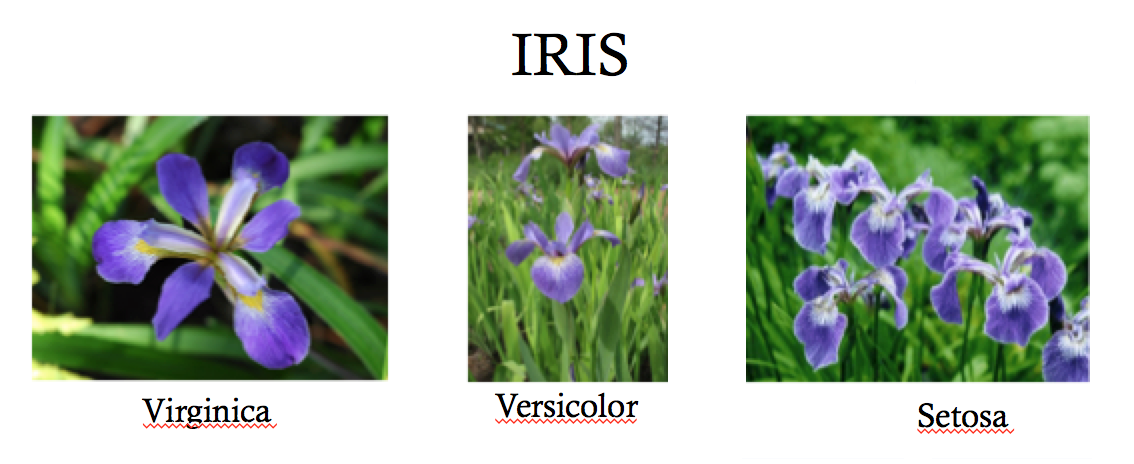

In [17]:
from IPython.display import Image
Image('IRIS.png')

# Read and Check IRIS Data

# Labels: ['setosa' 'versicolor' 'virginica']
# Features names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# Data: [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3 

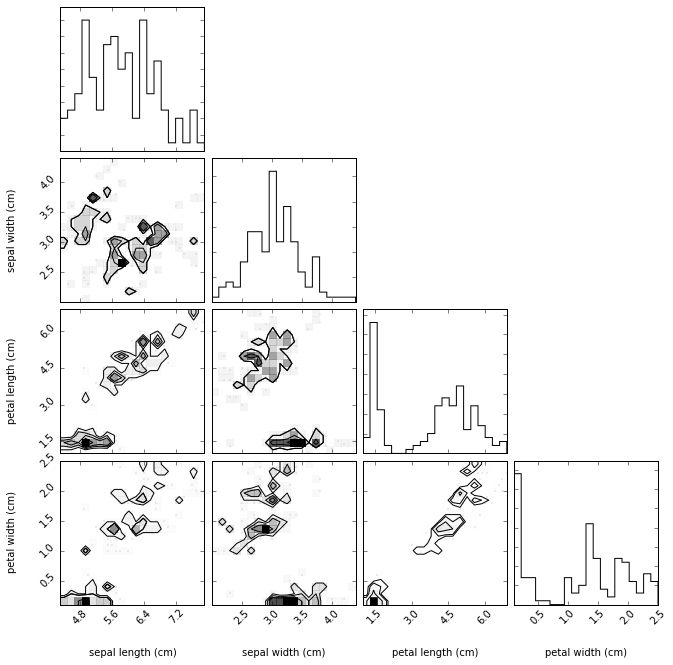

In [18]:
%matplotlib inline

import numpy as np
from sklearn import datasets

# Load the IRIS dataset
iris = datasets.load_iris()

print '# Labels:', iris.target_names
print '# Features names:', iris.feature_names
print '# Data:', iris.data

import corner
fig = corner.corner(iris.data, labels=iris.feature_names)

# Train a Naive Bayes Model and Predict

In [19]:
from sklearn.naive_bayes import GaussianNB

# Train and Fit
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)

print '# Done'

# Done


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150

# Confusion matrix
['setosa' 'versicolor' 'virginica']
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


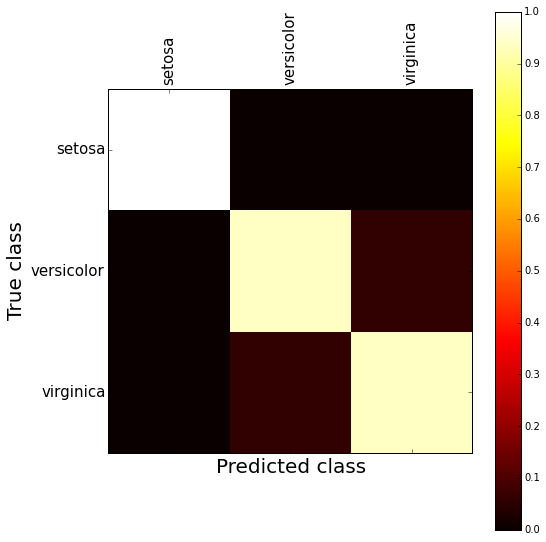

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Classification quality
print classification_report(iris.target, y_pred.tolist(),
    labels=np.unique(iris.target))

# Print and plot confusion matrix
cm = confusion_matrix(iris.target, y_pred.tolist(),
    labels=np.unique(iris.target))
cm_unity = (1.0*cm.T / np.sum(cm, axis=1)).T

print '# Confusion matrix'
print iris.target_names
print cm
cm_unity = (1.0*cm.T / np.sum(cm, axis=1)).T

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm_unity, cmap='hot')
fig.colorbar(cax)
plt.ylabel('True class', fontsize=20)
plt.xlabel('Predicted class', fontsize=20)

unique_label_replaced = [ele.replace('_', ' ') for ele in iris.target_names]
ax.set_xticks(np.arange(len(unique_label_replaced)))
ax.set_yticks(np.arange(len(unique_label_replaced)))
ax.set_xticklabels(unique_label_replaced, rotation=90., fontsize=15)
ax.set_yticklabels(unique_label_replaced, fontsize=15)
plt.tight_layout()